In [20]:
!pip install pandas

In [18]:
pip install Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 9.7 MB/s eta 0:00:0000:01:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.1 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


In [6]:
import pandas as pd

labels = pd.read_csv('byu-locating-bacterial-flagellar-motors-2025/train_labels.csv')
print(labels['tomo_id'].nunique())

648


In [7]:
print(labels['Number of motors'].value_counts())

Number of motors
1     313
0     286
2      56
4      36
6      18
3      18
10     10
Name: count, dtype: int64


In [2]:
import pandas as pd

# Load labels
df = pd.read_csv('byu-locating-bacterial-flagellar-motors-2025/train_labels.csv')

# Create a summary to count motors per tomogram
motor_counts = df.groupby('tomo_id')['Number of motors'].max().reset_index()
motor_counts.columns = ['tomo_id', 'motor_count']

# Categorize into bins
motor_counts['category'] = motor_counts['motor_count'].apply(
    lambda x: '1' if x == 1 else ('0' if x == 0 else '2+')
)

# Define sample sizes
sample_sizes = {'1': 30, '0': 15, '2+': 5}

# Sample per category
sampled_ids = []
for category, size in sample_sizes.items():
    subset = motor_counts[motor_counts['category'] == category]
    sampled = subset.sample(n=size, random_state=42)
    sampled_ids.extend(sampled['tomo_id'].tolist())

# Filter original labels to include only sampled tomograms
sampled_df = df[df['tomo_id'].isin(sampled_ids)]

# Save sampled labels
sampled_df.to_csv("sampled_train_labels.csv", index=False)

In [9]:
import os
import shutil

src_dir = "train"
dst_dir = "sampled_train"

os.makedirs(dst_dir, exist_ok=True)

for tomo_id in sampled_ids:
    src_path = os.path.join(src_dir, tomo_id)
    dst_path = os.path.join(dst_dir, tomo_id)
    if os.path.exists(src_path):
        shutil.copytree(src_path, dst_path)

In [10]:
labels = pd.read_csv('sampled_train_labels.csv')
print(labels.head())
print(labels['tomo_id'].nunique(), 'unique tomograms')

   row_id      tomo_id  Motor axis 0  Motor axis 1  Motor axis 2  \
0      14  tomo_0363f2          50.0         574.0         392.0   
1      17  tomo_04d42b          -1.0          -1.0          -1.0   
2      23  tomo_072a16          -1.0          -1.0          -1.0   
3      32  tomo_0a8f05          52.0         587.0         575.0   
4      58  tomo_1446aa         149.0         293.0         601.0   

   Array shape (axis 0)  Array shape (axis 1)  Array shape (axis 2)  \
0                   300                   960                   928   
1                   500                  1024                  1440   
2                   300                   960                   928   
3                   300                   928                   928   
4                   300                   960                   928   

   Voxel spacing  Number of motors  
0           13.1                 1  
1           13.3                 0  
2           16.8                 0  
3           13.1

In [12]:
import os
import shutil
import pandas as pd

# Load sampled labels
labels = pd.read_csv('sampled_train_labels.csv')
sampled_ids = labels['tomo_id'].unique()

# Define source (full dataset) and destination (sample)
src_root = "byu-locating-bacterial-flagellar-motors-2025/train"
dst_root = "sampled_train"

os.makedirs(dst_root, exist_ok=True)

for tomo_id in sampled_ids:
    src = os.path.join(src_root, tomo_id)
    dst = os.path.join(dst_root, tomo_id)
    if os.path.exists(src):
        shutil.copytree(src, dst)
    else:
        print(f"❌ Folder not found: {src}")

In [14]:
df_tomo = df[df['tomo_id'] == 'tomo_3e7783']
print(f"Found {len(df_tomo)} motor(s) in tomo_3e7783")

Found 1 motor(s) in tomo_3e7783


In [15]:
display(df_tomo[['Motor axis 0', 'Motor axis 1', 'Motor axis 2']])

,Motor axis 0,Motor axis 1,Motor axis 2
189,186.0,531.0,617.0


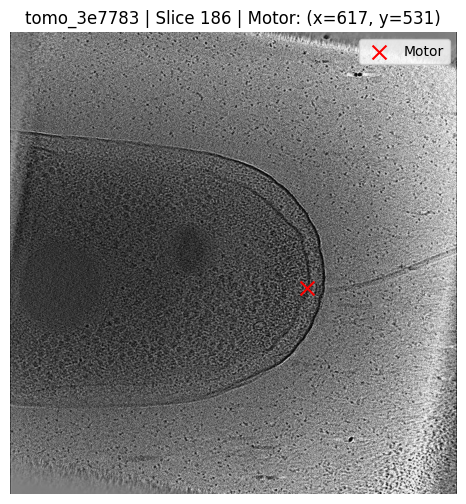

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

# Define path to tomogram
tomo_dir = os.path.join("sampled_train", "tomo_3e7783")

# Motor position
z, y, x = int(186), int(531), int(617)
slice_file = f"slice_{z:04d}.jpg"
img_path = os.path.join(tomo_dir, slice_file)

# Load and plot the image with the motor location
img = Image.open(img_path)

plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.scatter([x], [y], color='red', marker='x', s=100, label='Motor')
plt.title(f"tomo_3e7783 | Slice {z} | Motor: (x={x}, y={y})")
plt.axis('off')
plt.legend()
plt.show()

Number of tomograms: 648
count    648.000000
mean       1.137346
std        0.651685
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: count, dtype: float64


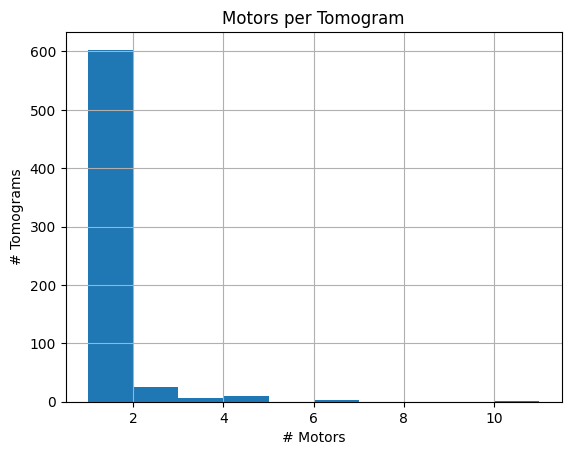

In [4]:
import matplotlib.pyplot as plt

# How many unique tomograms?
print("Number of tomograms:", df['tomo_id'].nunique())

# Motor count per tomogram
motor_counts = df['tomo_id'].value_counts()
print(motor_counts.describe())

# Histogram
motor_counts.hist(bins=range(1, motor_counts.max()+2))
plt.title("Motors per Tomogram")
plt.xlabel("# Motors")
plt.ylabel("# Tomograms")
plt.show()

In [6]:
print(df.columns.tolist())

['row_id', 'tomo_id', 'Motor axis 0', 'Motor axis 1', 'Motor axis 2', 'Array shape (axis 0)', 'Array shape (axis 1)', 'Array shape (axis 2)', 'Voxel spacing', 'Number of motors']


In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['row_id', 'tomo_id', 'Motor axis 0', 'Motor axis 1', 'Motor axis 2',
       'Array shape (axis 0)', 'Array shape (axis 1)', 'Array shape (axis 2)',
       'Voxel spacing', 'Number of motors'],
      dtype='object')